In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

: 

In [ ]:
df = pd.read_csv('Edges.csv')

: 

In [ ]:
df.head()

: 

In [9]:
df.columns

Index(['Source', 'Target', 'Relation'], dtype='object')

In [10]:
G = nx.from_pandas_edgelist(df,source='Source',target='Target')

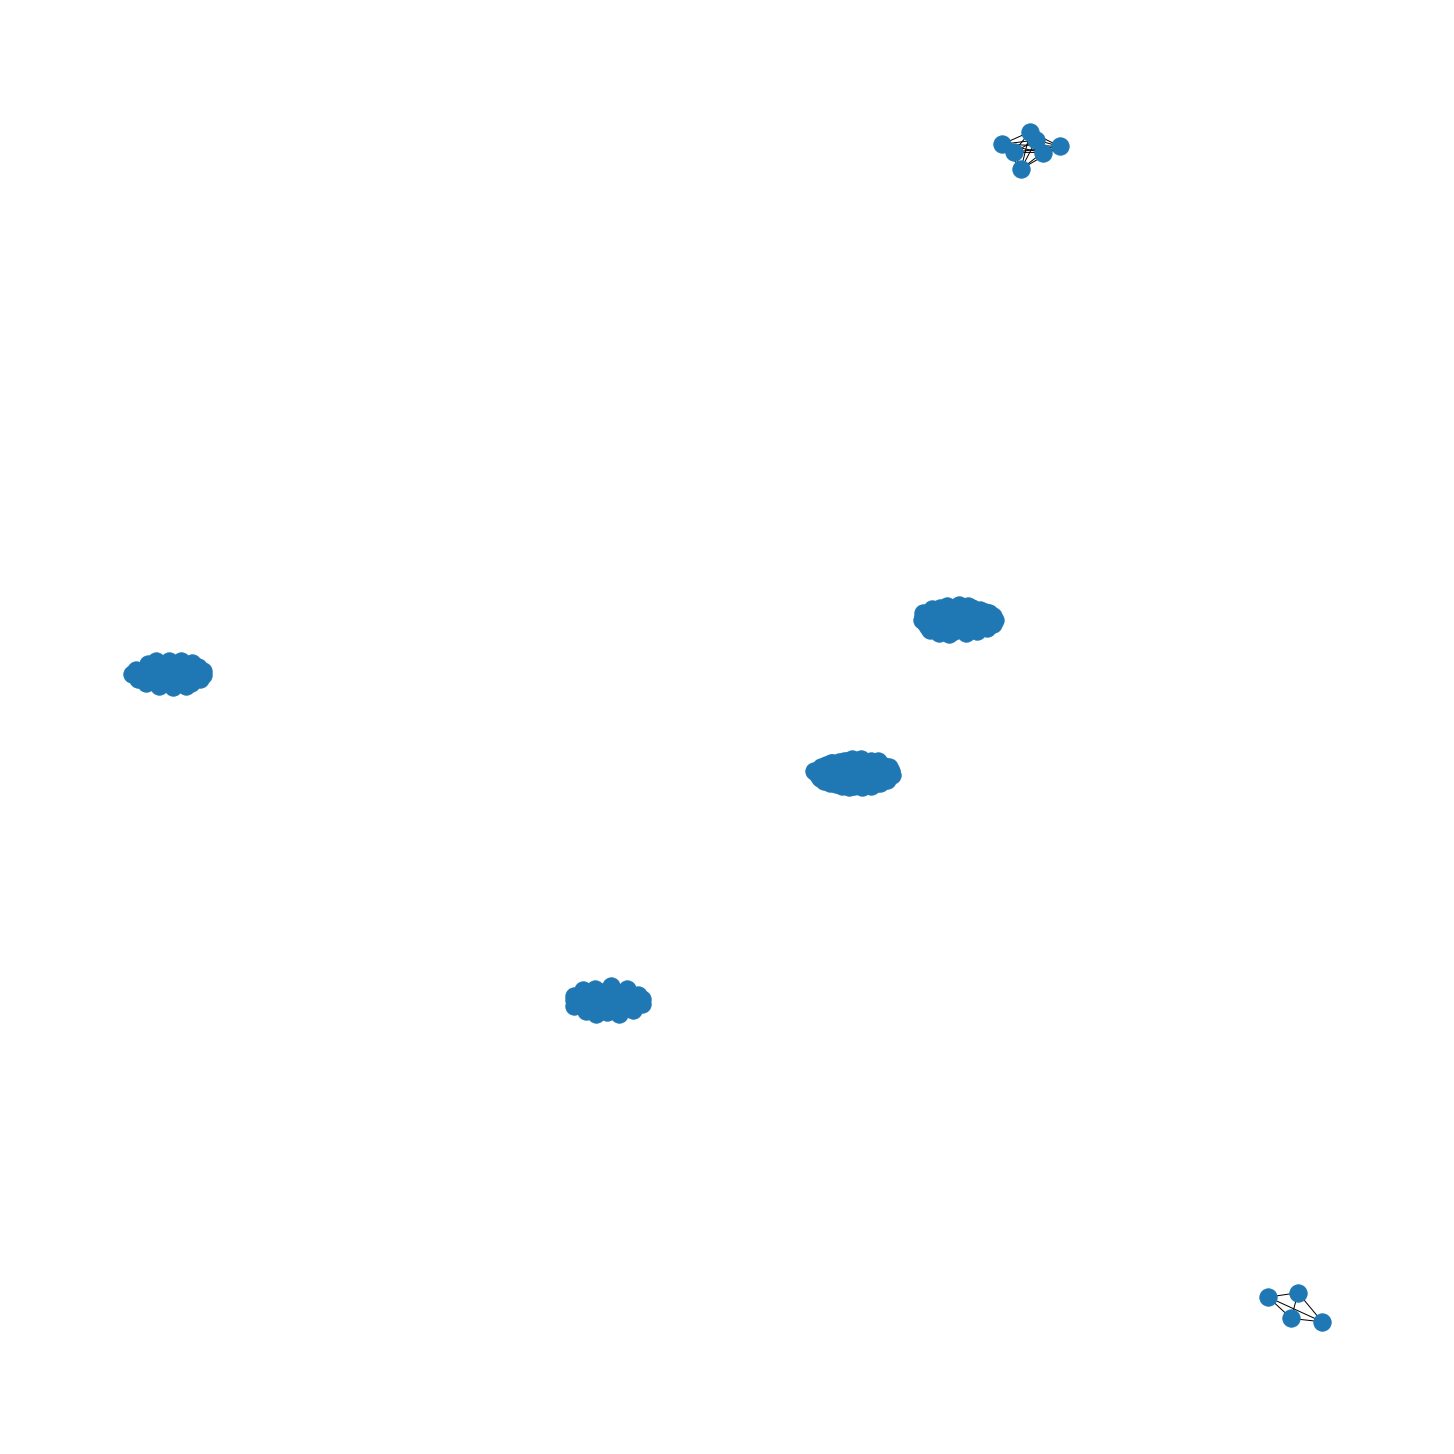

In [11]:
plt.figure(figsize=(20,20))
nx.draw(G)

(array([11.,  0.,  0., 59.,  0.,  0., 59.,  0.,  0., 86.]),
 array([ 3. , 11.2, 19.4, 27.6, 35.8, 44. , 52.2, 60.4, 68.6, 76.8, 85. ]),
 <BarContainer object of 10 artists>)

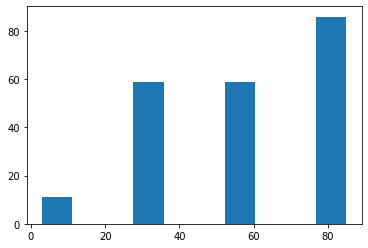

In [12]:
plt.hist([v for k,v in nx.degree(G)])

In [13]:
nx.cluster.average_clustering(G)

1.0

In [14]:
try:
    nx.diameter(G)
except Exception as e:
    print('Infinite Diameter')

Infinite Diameter


In [15]:
len(G)

215

In [16]:
def graph_to_edge_matrix(G):
    edge_mat = np.zeros((len(G),len(G)),dtype=int)
    for node in G:
        for neighbor in G.neighbors(node):
            edge_mat[node-1][neighbor-1]=1
        edge_mat[node-1][node-1]=1
    return edge_mat

In [17]:
df = pd.read_csv('Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [18]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [19]:
dataset = {
    'Sl_no':[],
    'Branch And Specialization':[],
    'Placement Status':[],
    'Salary':[]
}
for index,row in df.iterrows():
    dataset['Sl_no'].append(row['sl_no'])
    dataset['Branch And Specialization'].append(row['degree_t']+' '+row['specialisation'])
    dataset['Placement Status'].append(row['status'])
    dataset['Salary'].append(row['salary'])

In [20]:
len(df)

215

In [21]:
len(dataset['Salary'])

215

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [46]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [48]:
df.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [22]:
Dataframe = pd.DataFrame(dataset)
Dataframe.head()

,Sl_no,Branch And Specialization,Placement Status,Salary
0,1,Sci&Tech Mkt&HR,Placed,270000.0
1,2,Sci&Tech Mkt&Fin,Placed,200000.0
2,3,Comm&Mgmt Mkt&Fin,Placed,250000.0
3,4,Sci&Tech Mkt&HR,Not Placed,NaN
4,5,Comm&Mgmt Mkt&Fin,Placed,425000.0


In [23]:
Dataframe.isnull().sum()

Sl_no                         0
Branch And Specialization     0
Placement Status              0
Salary                       67
dtype: int64

In [24]:
Dataframe.fillna(value=0.0,inplace=True)
Dataframe.head()

,Sl_no,Branch And Specialization,Placement Status,Salary
0,1,Sci&Tech Mkt&HR,Placed,270000.0
1,2,Sci&Tech Mkt&Fin,Placed,200000.0
2,3,Comm&Mgmt Mkt&Fin,Placed,250000.0
3,4,Sci&Tech Mkt&HR,Not Placed,0.0
4,5,Comm&Mgmt Mkt&Fin,Placed,425000.0


In [25]:
Dataframe['Branch And Specialization'].value_counts()

Comm&Mgmt Mkt&Fin    86
Comm&Mgmt Mkt&HR     59
Sci&Tech Mkt&Fin     30
Sci&Tech Mkt&HR      29
Others Mkt&HR         7
Others Mkt&Fin        4
Name: Branch And Specialization, dtype: int64

In [ ]:
Dataframe[Dataframe['Branch And Specialization']=='Sci&Tech Mkt&HR']['Placement Status'].value_counts()

In [26]:
lst={
    'Sci&Tech Mkt&HR':list(Dataframe[Dataframe['Branch And Specialization']=='Sci&Tech Mkt&HR']['Placement Status'].value_counts()),
    'Sci&Tech Mkt&Fin':list(Dataframe[Dataframe['Branch And Specialization']=='Sci&Tech Mkt&Fin']['Placement Status'].value_counts()),
    'Comm&Mgmt Mkt&Fin':list(Dataframe[Dataframe['Branch And Specialization']=='Comm&Mgmt Mkt&Fin']['Placement Status'].value_counts()),
    'Comm&Mgmt Mkt&HR':list(Dataframe[Dataframe['Branch And Specialization']=='Comm&Mgmt Mkt&HR']['Placement Status'].value_counts()),
    'Others Mkt&HR':list(Dataframe[Dataframe['Branch And Specialization']=='Others Mkt&HR']['Placement Status'].value_counts()),
    'Others Mkt&Fin':list(Dataframe[Dataframe['Branch And Specialization']=='Others Mkt&Fin']['Placement Status'].value_counts()),
}
lst

{'Sci&Tech Mkt&HR': [16, 13],
 'Sci&Tech Mkt&Fin': [25, 5],
 'Comm&Mgmt Mkt&Fin': [68, 18],
 'Comm&Mgmt Mkt&HR': [34, 25],
 'Others Mkt&HR': [4, 3],
 'Others Mkt&Fin': [2, 2]}

In [27]:
avg_salary = []

In [28]:
# Average Salary of Sci&Tech Mkt&HR
avg_salary.append((Dataframe[Dataframe['Branch And Specialization']=='Sci&Tech Mkt&HR']['Salary'].sum()/len(Dataframe[Dataframe['Branch And Specialization']=='Sci&Tech Mkt&HR'])).round(2))

In [29]:
# Average Salary of Comm&Mgmt Mkt&Fin
avg_salary.append((Dataframe[Dataframe['Branch And Specialization']=='Comm&Mgmt Mkt&Fin']['Salary'].sum()/len(Dataframe[Dataframe['Branch And Specialization']=='Comm&Mgmt Mkt&Fin'])).round(2))

In [30]:
# Average Salary of Comm&Mgmt Mkt&HR
avg_salary.append((Dataframe[Dataframe['Branch And Specialization']=='Comm&Mgmt Mkt&HR']['Salary'].sum()/len(Dataframe[Dataframe['Branch And Specialization']=='Comm&Mgmt Mkt&HR'])).round(2))

In [31]:
# Average Salary of Sci&Tech Mkt&Fin
avg_salary.append((Dataframe[Dataframe['Branch And Specialization']=='Sci&Tech Mkt&Fin']['Salary'].sum()/len(Dataframe[Dataframe['Branch And Specialization']=='Sci&Tech Mkt&Fin'])).round(2))

In [32]:
# Average Salary of Others Mkt&HR
avg_salary.append((Dataframe[Dataframe['Branch And Specialization']=='Others Mkt&HR']['Salary'].sum()/len(Dataframe[Dataframe['Branch And Specialization']=='Others Mkt&HR'])).round(2))

In [33]:
# Average Salary of Others Mkt&Fin
avg_salary.append((Dataframe[Dataframe['Branch And Specialization']=='Others Mkt&Fin']['Salary'].sum()/len(Dataframe[Dataframe['Branch And Specialization']=='Others Mkt&Fin'])).round(2))

In [34]:
avg_salary

[166586.21, 229337.21, 147406.78, 268933.33, 114571.43, 150000.0]

In [35]:
bxaxis = ['Sci&Tech Mkt&HR','Sci&Tech Mkt&Fin','Comm&Mgmt Mkt&Fin','Comm&Mgmt Mkt&HR','Others Mkt&HR','Others Mkt&Fin']
byaxis = [lst[bxaxis[_]][1] for _ in range(len(lst))]

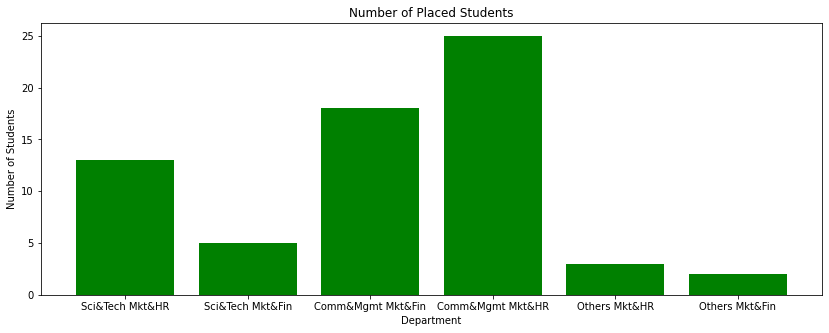

In [39]:
plt.figure(figsize=(14,5))
plt.bar(bxaxis, byaxis, color='g')
plt.title("Number of Placed Students")
plt.xlabel("Department")
plt.ylabel("Number of Students")
plt.show()

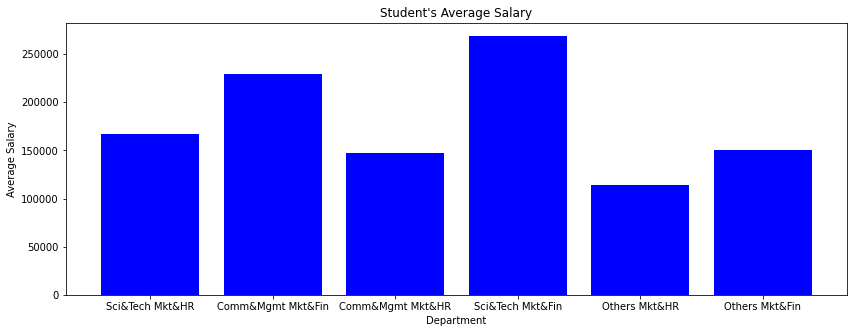

In [41]:
gxaxis = ['Sci&Tech Mkt&HR','Comm&Mgmt Mkt&Fin','Comm&Mgmt Mkt&HR','Sci&Tech Mkt&Fin','Others Mkt&HR','Others Mkt&Fin']
plt.figure(figsize=(14,5))
plt.bar(gxaxis, avg_salary, color='b')
plt.title("Student's Average Salary")
plt.xlabel("Department")
plt.ylabel("Average Salary")
plt.show()

In [38]:
print("Hence from this analysis we can know that " + gxaxis[avg_salary.index(max(avg_salary))] + " has high Average Salary")
print("Hence from this analysis we can know that " + bxaxis[byaxis.index(max(byaxis))] + " has high Highest Placement")

Hence from this analysis we can know that Sci&Tech Mkt&Fin has high Average Salary
Hence from this analysis we can know that Comm&Mgmt Mkt&HR has high Highest Placement
